<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF OPE - 2019</span></p>
<p><font size="4">  UE Machine Learning and advanced processing methods for multi-sensor data  </font></p>
<p></p>
<p><font size="5">  Notebook 03: Python lab - Clustering </font></p>
</p></br>
</p>
</CENTER>

# <span style="color:#00B8DE"> 1. Kmeans clustering algorithms</span> 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from sklearn import datasets

#### Question 1: Generate a random dataset in two dimensions which is divided into $K$ groups. Each group has N elements and centered to K given centers.

In [21]:
def generate_data(centers, nb_elements):
    data=datasets.make_blobs(n_samples=nb_elements,centers=centers, random_state=42)
    return data


#### Question 2: Plot the generated data

[1 5 8]


Text(0.5, 1.0, 'Random dataset with 200 points divided in 3 groups')

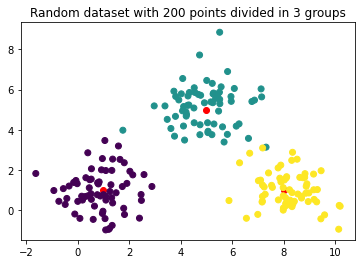

In [71]:

# test  
centers = np.array([[1,1], [5,5], [8,1]])
nb_elements = 200
data = generate_data(centers, nb_elements)

# figure
plt.figure()
plt.scatter(centers[:,0], centers[:,1], c='red') 
plt.scatter(data[0][:,0], data[0][:,1], c=data[1]) 
plt.title("Random dataset with 200 points divided in 3 groups")

#### Question 3: Implement Kmeans algorithm

In [191]:
import math
def distance(data,center):
    return np.linalg.norm(data - center)

In [250]:
# Kmeans algorithm
def Kmeans(data, init_centers):
    centers=init_centers
    old_centers = np.random.rand(len(centers), 2)
    predictions = np.zeros([len(data)])
    epsilon = 1e-3
    
    #while np.sum([distance(centers[i,:],old_centers[i,:]) for i in range(len(centers))]) > epsilon :
    while distance(centers,old_centers) > epsilon:
        
        # Browse the generated dataset
        for (i,sample) in enumerate(data):
            # Store in a list the distance to every center
            distances=[np.sum(distance(sample,centers[a])) for a in range(len(centers))]
            
            # Retrieve the index of the minimum of the list
            #idx = np.where(distances == min(distances))[0][0]
            idx=np.argmin(distances)
            #print(min(distances))
            #print(np.where(min(distances)))
            
            # Put the idx of the nearest centers in the predictions array
            predictions[i]=idx
            
        old_centers=centers
        
        # Browse the centers
        for l in range(len(centers)):
            # Get the index of the samples that were predicted to belong to the center considered
            index=np.where(predictions == l)
            
            # Compute the mean of all the samples belonging to the center considered and it is the new center
            centers[l]=np.mean(data[index],axis=0)
    clusters=predictions
    
    # Browse the generated dataset
    for (i,sample) in enumerate(data):
            # Store in a list the distance to every center
        distances=[np.sum(distance(sample,centers[a])) for a in range(len(centers))]
            
            # Retrieve the index of the minimum of the list
            #idx = np.where(distances == min(distances))[0][0]
        idx=np.argmin(distances)
            #print(min(distances))
            #print(np.where(min(distances)))
            
            # Put the idx of the nearest centers in the predictions array
        predictions[i]=idx
            
     
    return centers, clusters


In [243]:
# Kmeans algorithm
def Kmeans(data, init_centers):
    centers = init_centers
    old_centers = np.random.rand(len(centers), 2)
    predictions = np.zeros([len(data)])
    epsilon = 1e-3
    
    while np.sum([distance(centers[i,:],old_centers[i,:]) for i in range(len(centers))]) > epsilon :
        for i, sample in enumerate(data):
            distances = []
            for center in centers:
                dist = np.sum((sample - center)**2)
                distances.append(dist)
            #print(distances)
            #print(min(distances))
            #print(np.where(distances == min(distances))[0])
            idx_class = np.where(distances == min(distances))[0][0]
            idx_class = np.argmin(distances)
            predictions[i] = idx_class
        
        old_centers = centers
        for i, center in enumerate(centers):
            idx_samples = np.where(predictions == i)
            samples = data[idx_samples]
            newLoc = np.mean(samples, axis = 0)
            centers[i] = newLoc
            
    return centers, predictions

#### Question 4: Plot the segmented result using Kmeans

[[2.78526485 0.7980005 ]
 [1.50054996 1.98323915]
 [1.27372813 1.04970599]]


Text(0.5, 1.0, 'KMeans results on the random dataset')

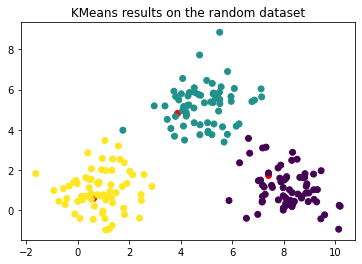

In [251]:
# test Kmeans algo
init_centers = np.random.rand(3,2)*5
print(init_centers)

centers_new, clusters_new = Kmeans(data[0], init_centers)

# figure
plt.figure()
plt.scatter(centers_new[:,0], centers_new[:,1], c='red') 
plt.scatter(data[0][:,0], data[0][:,1], c=clusters_new) 
plt.title("KMeans results on the random dataset")

#### Question 5: Demonstrate performance of method in a quantitative manner

# <span style="color:#00B8DE"> 2. Image segmentation</span> 

#### Question 6: Use io.imread function from skimage to read satellite image, called TF0v7 (from SAT data)  then show this image. Use np.loadtxt to read labels.

Text(0.5, 1.0, 'TFOv7')

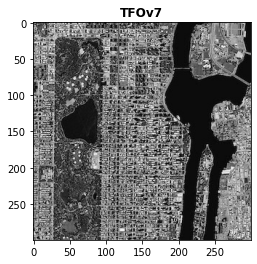

In [252]:
# read image 
TFOv7 = io.imread('SAT/TFOv7.png').astype(np.uint8)[:,:,0]

labels = np.loadtxt("SAT/TFOv7_labels.txt", dtype='float', delimiter=',')

plt.figure()
plt.imshow(TFOv7, cmap='gray')
plt.title('TFOv7', fontweight='bold')

#### Question 7: Use Kmeans algorithm to segment this image and show the result. Note that it contains three classes = 'building', 'vegetation', and  'water'
 

In [256]:
init_centers = np.random.rand(3,1)*5

centers_new, clusters_new = Kmeans(TFOv7.reshape(-1), init_centers)

[[99.61514068]
 [ 0.39284436]
 [ 3.47880299]]


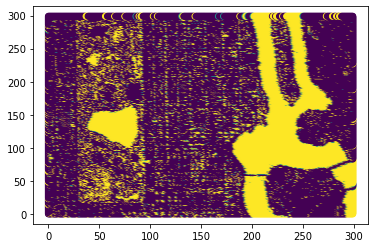

In [257]:
# figure
print(centers_new)
x,y=np.meshgrid(np.arange(0,300,1),np.arange(0,300,1))
plt.scatter(x,y,c=clusters_new)

#### Question 8: Use PCA method to reduce the image in two dimensions and show the result. Plot the three dimensions. (Use the svd function from numpy.linalg)

In [ ]:
U, s, V = np.linalg.svd(img_vec, full_matrices = False)

covMatrix = np.cov(data,bias=True)

# Plot 

#### Question 9: Use Kmeans algorithm to segment this new image (img_axe12) and compare with the results obtained when applying the method on the original image

In [ ]:
img_axe1 = ...
img_axe2 = ...
img_axe3 = ...
img_axe12 = ... #stack img_axe1, img_axe2 and a third dimension of zeros 


#### Question 10: Compare with the results obtained with only 2 dimensions of the original image (try with dim 1&2, 1&3 and/or 2&3)

#### BONUS : Use SVM algorithm to segment this image and compare with the result obtained by Kmeans 

In [ ]:
from sklearn.svm import SVC

data_training = ...
data_test = ...
y_training = ...

clf = SVC(gamma='auto')
clf.fit(data_training, y_training)
y_test = clf.predict(data_test)